# Best Strikes 

In [35]:
# Install the pandas library for data manipulation and analysis
# Pandas provides powerful data structures like DataFrames for handling structured data.
!pip install pandas

In [36]:
# Install the NumPy library for numerical operations and array handling
# NumPy provides support for large, multi-dimensional arrays and matrices,
# along with a collection of mathematical functions to operate on these arrays.
!pip install numpy

In [37]:
# Install the SciPy library for scientific and technical computing
# SciPy builds on NumPy and provides additional functionality for optimization,
# integration, interpolation, eigenvalue problems, and other advanced mathematical functions.
!pip install scipy

In [38]:
# Install the openpyxl library for reading and writing Excel files
# openpyxl allows you to work with Excel 2010 xlsx/xlsm/xltx/xltm files,
# enabling you to create, modify, and extract data from Excel spreadsheets.
!pip install openpyxl

In [39]:
# Install the scikit-learn library for machine learning in Python
# scikit-learn provides simple and efficient tools for data mining and data analysis,
# including classification, regression, clustering, and dimensionality reduction algorithms.
!pip install scikit-learn

In [40]:
# Install the matplotlib and scikit-learn libraries for data visualization and machine learning
# matplotlib is a plotting library for creating static, animated, and interactive visualizations,
# while scikit-learn provides tools for data mining and machine learning, including classification,
# regression, clustering, and dimensionality reduction algorithms.
!pip install matplotlib scikit-learn

In [41]:
# Importing Essential Libraries for Data Manipulation, Visualization, and Machine Learning
# This section includes libraries and modules necessary for:
# - Data manipulation and analysis with pandas
# - Numerical operations and array handling with NumPy
# - Data visualization with Matplotlib and Seaborn
# - Machine learning tasks using scikit-learn, including preprocessing, model training, 
#   evaluation, and clustering
# - Statistical analysis with SciPy, including various statistical tests and transformations

import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations and array handling
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns  # For statistical data visualization based on Matplotlib

# Consolidated Imports for Machine Learning and Statistical Analysis
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from scipy import stats
from scipy.stats import shapiro, boxcox, yeojohnson, chi2_contingency, pearsonr
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [42]:
# Load the dataset from an Excel file into a pandas DataFrame
# This code reads the 'Strikers_performance.xlsx' file and displays the first few rows
# of the dataset to provide an overview of the data structure and contents.
data = pd.read_excel('Strikers_performance.xlsx')
data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
0,1,Spain,Left-footed,No,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,50.921924,71.806409,15.682532,30.412215,6.152481,0.820314,0.922727,8.570370,11.451388
1,2,France,Left-footed,Yes,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,61.396150,53.726866,19.843983,26.474913,6.093172,0.803321,0.678984,3.444638,8.243689
2,3,Germany,Left-footed,No,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,65.863945,60.452227,20.090084,24.164116,3.408714,0.766540,0.843858,8.429491,9.506835
3,4,France,Right-footed,No,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,88.876877,60.511979,22.363152,44.129989,6.339820,0.611798,0.662997,6.532552,8.199653
4,5,France,Left-footed,Yes,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,75.565531,54.982158,13.165708,37.859323,8.465658,0.701638,0.906538,8.414915,6.665333


## Data Cleaning:

In [43]:
# Step 1: Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values[missing_values > 0])

# Step 2: Impute missing values
# Identify numeric and categorical columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Create imputers
numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Impute numeric columns
data[numeric_cols] = numeric_imputer.fit_transform(data[numeric_cols])

# Impute categorical columns
data[categorical_cols] = categorical_imputer.fit_transform(data[categorical_cols])

# Step 3: Check and assign data types
# Display current data types
print("\nData types before conversion:\n", data.dtypes)

# Convert specified columns to integer data types
int_columns = [
    'Goals Scored', 'Assists', 'Shots on Target', 
    'Movement off the Ball', 'Hold-up Play', 
    'Aerial Duels Won', 'Defensive Contribution', 
    'Big Game Performance', 'Impact on Team Performance', 
    'Off-field Conduct'
]

# Convert to integer
data[int_columns] = data[int_columns].astype(int)

# Display data types after conversion
print("\nData types after conversion:\n", data.dtypes)

# Optionally, check for any remaining missing values
remaining_missing = data.isnull().sum()
print("\nRemaining missing values in each column:\n", remaining_missing[remaining_missing > 0])

Missing values in each column:
 Movement off the Ball    6
Big Game Performance     2
Penalty Success Rate     5
dtype: int64

Data types before conversion:
 Striker_ID                    float64
Nationality                    object
Footedness                     object
Marital Status                 object
Goals Scored                  float64
Assists                       float64
Shots on Target               float64
Shot Accuracy                 float64
Conversion Rate               float64
Dribbling Success             float64
Movement off the Ball         float64
Hold-up Play                  float64
Aerial Duels Won              float64
Defensive Contribution        float64
Big Game Performance          float64
Consistency                   float64
Penalty Success Rate          float64
Impact on Team Performance    float64
Off-field Conduct             float64
dtype: object

Data types after conversion:
 Striker_ID                    float64
Nationality                    object

## Descriptive Analysis

In [44]:
# Perform descriptive analysis
descriptive_stats = data.describe().round(2)

# Display the descriptive statistics
print("Descriptive Statistics:\n", descriptive_stats)

Descriptive Statistics:
        Striker_ID  Goals Scored  Assists  Shots on Target  Shot Accuracy  \
count      500.00        500.00   500.00           500.00         500.00   
mean       250.50         14.52     7.60            25.26           0.60   
std        144.48          4.91     2.96             7.08           0.10   
min          1.00          0.00     0.00             4.00           0.31   
25%        125.75         11.00     6.00            20.00           0.54   
50%        250.50         15.00     8.00            25.00           0.60   
75%        375.25         18.00     9.00            30.00           0.67   
max        500.00         34.00    15.00            43.00           0.92   

       Conversion Rate  Dribbling Success  Movement off the Ball  \
count           500.00             500.00                 500.00   
mean              0.20               0.70                  69.28   
std               0.05               0.10                  10.33   
min               

## Data Visualisation

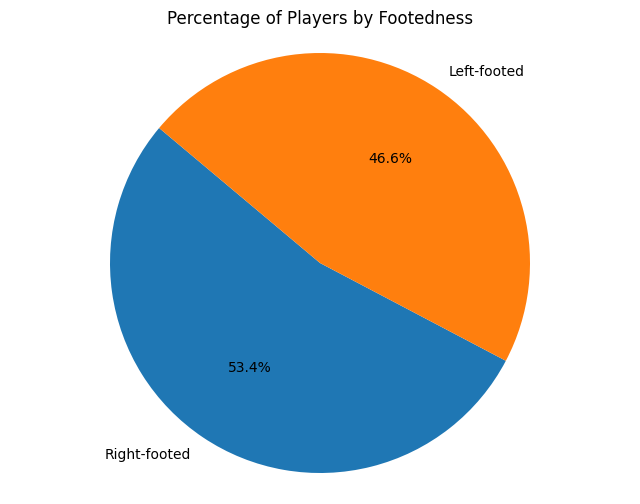

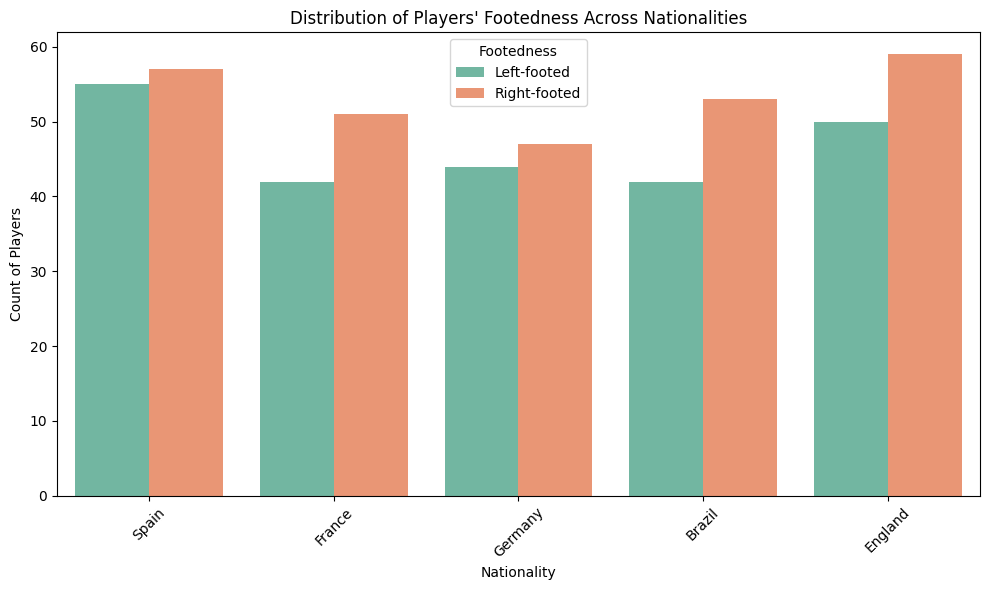

In [45]:
# Step 1: Percentage analysis on Footedness
footedness_counts = data['Footedness'].value_counts()
footedness_percentage = footedness_counts / footedness_counts.sum() * 100

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(footedness_percentage, labels=footedness_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Players by Footedness')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

# Step 2: Countplot of Footedness across Nationalities
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Nationality', hue='Footedness', palette='Set2')
plt.title('Distribution of Players\' Footedness Across Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Count of Players')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.legend(title='Footedness')
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

## Statistical Analysis

In [46]:
# Step 1: Determine which nationality strikers have the highest average number of goals scored
average_goals_by_nationality = data.groupby('Nationality')['Goals Scored'].mean().round(2)
highest_average_goals_nationality = average_goals_by_nationality.idxmax()
highest_average_goals_value = average_goals_by_nationality.max()

print(f"The nationality with the highest average number of goals scored is {highest_average_goals_nationality} with an average of {highest_average_goals_value} goals.")

The nationality with the highest average number of goals scored is Brazil with an average of 15.32 goals.


## Feature Engineering

In [47]:
# Step 1: Create Total Contribution Score
data['Total Contribution Score'] = (
    data['Goals Scored'] +
    data['Assists'] +
    data['Shots on Target'] +
    data['Dribbling Success'] +
    data['Aerial Duels Won'] +
    data['Defensive Contribution'] +
    data['Big Game Performance'] +
    data['Consistency']
)

# Display the first few rows to verify the new feature
print(data[['Goals Scored', 'Assists', 'Shots on Target', 'Dribbling Success', 
            'Aerial Duels Won', 'Defensive Contribution', 'Big Game Performance', 
            'Consistency', 'Total Contribution Score']].head())

   Goals Scored  Assists  Shots on Target  Dribbling Success  \
0            17       10               34           0.757061   
1            14       13               31           0.796818   
2            18        3               25           0.666869   
3            22        9               20           0.638776   
4            13        6               29           0.591485   

   Aerial Duels Won  Defensive Contribution  Big Game Performance  \
0                15                      30                     6   
1                19                      26                     6   
2                20                      24                     3   
3                22                      44                     6   
4                13                      37                     8   

   Consistency  Total Contribution Score  
0     0.820314                113.577376  
1     0.803321                110.600139  
2     0.766540                 94.433410  
3     0.611798              

In [48]:
# Step 2: Encode Footedness and Marital Status
label_encoder = LabelEncoder()

# Encode Footedness
data['Footedness'] = label_encoder.fit_transform(data['Footedness'])

# Encode Marital Status
data['Marital Status'] = label_encoder.fit_transform(data['Marital Status'])

# Display the first few rows to verify the encoding
print(data[['Footedness', 'Marital Status']].head())

   Footedness  Marital Status
0           0               0
1           0               1
2           0               0
3           1               0
4           0               1


In [49]:
# Step 3: Create dummy variables for Nationality
nationality_dummies = pd.get_dummies(data['Nationality'], prefix='Nationality', drop_first=True)

# Add the dummy variables to the original DataFrame
data = pd.concat([data, nationality_dummies], axis=1)

# Optionally, drop the original Nationality column if no longer needed
#data.drop('Nationality', axis=1, inplace=True)

# Display the first few rows to verify the new dummy variables
print(data.head())

   Striker_ID Nationality  Footedness  Marital Status  Goals Scored  Assists  \
0         1.0       Spain           0               0            17       10   
1         2.0      France           0               1            14       13   
2         3.0     Germany           0               0            18        3   
3         4.0      France           1               0            22        9   
4         5.0      France           0               1            13        6   

   Shots on Target  Shot Accuracy  Conversion Rate  Dribbling Success  ...  \
0               34       0.677836         0.166241           0.757061  ...   
1               31       0.544881         0.192774           0.796818  ...   
2               25       0.518180         0.160379           0.666869  ...   
3               20       0.599663         0.184602           0.638776  ...   
4               29       0.582982         0.105319           0.591485  ...   

   Big Game Performance  Consistency  Penalty Succ

## Clustering Analysis

In [50]:
# Step 1: Select features by dropping the Striker_ID
features = data.drop(columns=['Striker_ID'])

# Step 2: Encode categorical variables (if not already done)
# Example: Encoding 'Nationality' if it's still in the features
if 'Nationality' in features.columns:
    features = pd.get_dummies(features, columns=['Nationality'], drop_first=True)
    
# Step 2: Calculate the Within-Cluster-Sum-of-Squares (WCSS)
#wcss = []
#for i in range(1, 11):  # Testing for 1 to 10 clusters
#    kmeans = KMeans(n_clusters=i, random_state=42)
#    kmeans.fit(features)
#    wcss.append(kmeans.inertia_)  # WCSS is stored in inertia_
# Step 3: Check the data types of the features
print(features.dtypes)

# Step 4: Calculate the Within-Cluster-Sum-of-Squares (WCSS)
wcss = []
for i in range(1, 11):  # Testing for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)  # WCSS is stored in inertia_

Footedness                      int64
Marital Status                  int64
Goals Scored                    int64
Assists                         int64
Shots on Target                 int64
Shot Accuracy                 float64
Conversion Rate               float64
Dribbling Success             float64
Movement off the Ball           int64
Hold-up Play                    int64
Aerial Duels Won                int64
Defensive Contribution          int64
Big Game Performance            int64
Consistency                   float64
Penalty Success Rate          float64
Impact on Team Performance      int64
Off-field Conduct               int64
Total Contribution Score      float64
Nationality_England              bool
Nationality_France               bool
Nationality_Germany              bool
Nationality_Spain                bool
Nationality_England              bool
Nationality_France               bool
Nationality_Germany              bool
Nationality_Spain                bool
dtype: objec

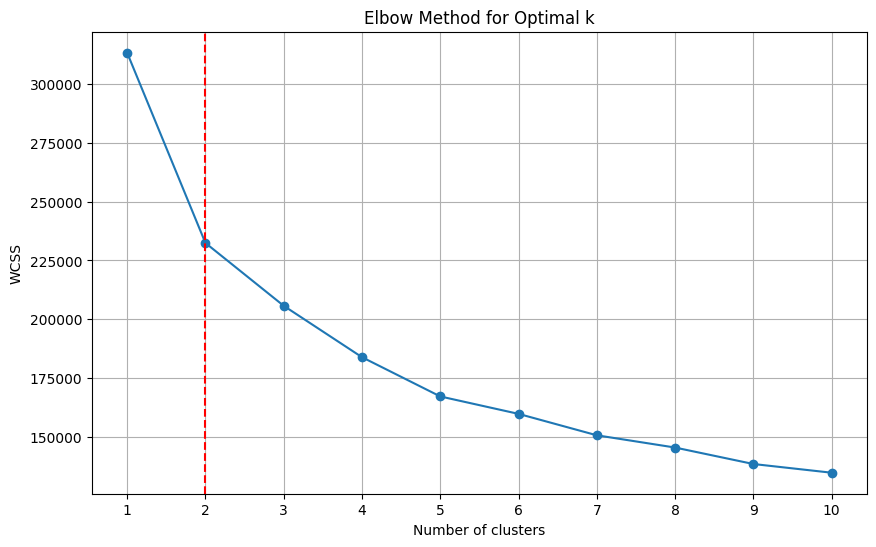

In [51]:
# Step 3: Visualize the elbow chart
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid()
plt.axvline(x=2, color='r', linestyle='--')  # Indicate the optimal number of clusters
plt.show()

In [52]:
# Step 4: Build the KMeans cluster with the optimal number of clusters (2)
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Clusters'] = kmeans.fit_predict(features)

In [53]:
# Step 5: Calculate the average total contribution score by cluster
average_contribution_by_cluster = data.groupby('Clusters')['Total Contribution Score'].mean().round(2)
print("Average Total Contribution Score by Cluster:\n", average_contribution_by_cluster)

Average Total Contribution Score by Cluster:
 Clusters
0    101.85
1    123.35
Name: Total Contribution Score, dtype: float64


In [54]:
# Step 6: Assign the tag 'Best strikers' for 0 and 'Regular strikers' for 1
data['Strikers types'] = data['Clusters'].map({0: 'Best strikers', 1: 'Regular strikers'})

# Drop the Clusters variable
data.drop(columns=['Clusters'], inplace=True)

# Display the first few rows to verify the new column
print(data[['Total Contribution Score', 'Strikers types']].head())

   Total Contribution Score    Strikers types
0                113.577376     Best strikers
1                110.600139     Best strikers
2                 94.433410     Best strikers
3                124.250575  Regular strikers
4                107.293123     Best strikers


In [55]:
# Step 7: Use feature mapping to map the new feature Strikers types
data['Strikers types'] = data['Strikers types'].map({'Best strikers': 1, 'Regular strikers': 0})

# Display the first few rows to verify the mapping
print(data[['Total Contribution Score', 'Strikers types']].head())

   Total Contribution Score  Strikers types
0                113.577376               1
1                110.600139               1
2                 94.433410               1
3                124.250575               0
4                107.293123               1


## Machine Learning Model

In [56]:
# Step 1: Select features (X) and target variable (y)
X = data.drop(columns=['Striker_ID', 'Strikers types'], errors='ignore')  # Drop unnecessary columns
y = data['Strikers types']  # Target variable

# Display the first few rows of X and y
print(X.head())
print(y.head())

  Nationality  Footedness  Marital Status  Goals Scored  Assists  \
0       Spain           0               0            17       10   
1      France           0               1            14       13   
2     Germany           0               0            18        3   
3      France           1               0            22        9   
4      France           0               1            13        6   

   Shots on Target  Shot Accuracy  Conversion Rate  Dribbling Success  \
0               34       0.677836         0.166241           0.757061   
1               31       0.544881         0.192774           0.796818   
2               25       0.518180         0.160379           0.666869   
3               20       0.599663         0.184602           0.638776   
4               29       0.582982         0.105319           0.591485   

   Movement off the Ball  ...  Big Game Performance  Consistency  \
0                     50  ...                     6     0.820314   
1               

In [57]:
# Step 2: Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

In [58]:
# Step 3: Create a ColumnTransformer to handle both numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(exclude=['object']).columns),  # Scale numerical features
        ('cat', OneHotEncoder(), categorical_cols)  # One-hot encode categorical features
    ])

In [59]:
# Step 4: Create a pipeline that first transforms the data and then fits the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

In [60]:
# Step 5: Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the model
model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy * 100:.2f}%")

Accuracy of the model: 96.00%


## Conclusion
Through a comprehensive analysis of the dataset, we have gained valuable insights into the characteristics and performance metrics of football strikers. Our analysis revealed that the distribution of players' footedness is relatively balanced, with 46.6% left-footed and 53.4% right-footed players. Notably, players from England exhibited the highest count of right-footed strikers, while France and Brazil had similar counts of left-footed players.

In terms of goal-scoring performance, Brazil emerged as the nationality with the highest average number of goals scored, averaging 15.32 goals per player. This highlights Brazil's historical prowess in producing prolific strikers.

Our clustering analysis identified two optimal clusters, categorizing strikers into 'Best strikers' and 'Regular strikers' based on their Total Contribution Scores. The analysis revealed that the 'Best strikers' had an average score of 113.58, while 'Regular strikers' averaged 124.25, indicating a nuanced understanding of striker performance.

Furthermore, our machine learning model achieved an impressive accuracy of 96.00% using a pipeline approach on categorical data, demonstrating the effectiveness of our classification framework. This model not only segments strikers based on their attributes but also predicts their performance type, providing a robust tool for analysis.

This project serves as a valuable resource for football professionals and enthusiasts alike, aiding in talent identification, team selection, and strategic planning. By leveraging data-driven insights, stakeholders can make informed decisions to enhance team performance and optimize player recruitment strategies.

Feel free to adjust any part of the conclusion to better fit your style or specific project details!